In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lasio
import pywt
from scipy import linalg, signal, fft, interpolate, stats
from sklearn.preprocessing import MinMaxScaler


def plot_curve(ax, df, curve, lb=None, ub=None, color='k', pad=0, s=2, mult=1,
            units:str=None, mask=None, offset:int=0, title:str=None, subtitle:str=None,
            label:str=None, semilog:bool=False, bar:bool=False, 
            fill:bool=None, rightfill:bool=False,
            marker=None, edgecolor=None, ls=None, alpha=None):
        if mask is None:
            x, y = -offset+mult*df[curve], df.index
        else:
            x, y = -offset+mult*df[curve][mask], df.index[mask]
        lb = x[~np.isnan(x)].min() if lb is None else lb
        ub = x[~np.isnan(x)].max() if ub is None else ub
        if semilog:
            ax.semilogx(x, y, c=color, label=curve, alpha=alpha,
                        marker=marker, markersize=s, markeredgecolor=edgecolor, linestyle=ls, linewidth=s)
        else:
            if bar:
                ax.barh(y, x, color=color, label=curve, alpha=alpha)
            else:
                ax.plot(x, y, c=color, label=curve, alpha=alpha,
                        marker=marker, markersize=s, markeredgecolor=edgecolor, linewidth=s, linestyle=ls)
        if fill:
            if rightfill:
                ax.fill_betweenx(y, x, ub, alpha=alpha, color=color)
            else:
                ax.fill_betweenx(y, lb, x, alpha=alpha, color=color)
        if units is None:
            if hasattr(df, 'curvesdict'):
                units = df.curvesdict[curve].unit
            else:
                units = ''
        ax.set_xlim(lb, ub)
        ax.grid(True, which='both')
        ax.set_title(title, weight='bold') if title != None else None
        xlab = label if label is not None else curve
        if offset != 0:
            ax.set_xlabel('{} [{}] with {} offset'.format(xlab, units, offset), color=color, weight='bold')
        else:
            ax.set_xlabel('{} [{}]'.format(xlab, units), color=color, weight='bold')
        ax.xaxis.set_label_position('top'); ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_tick_params(color=color, width=s)
        ax.spines['top'].set_position(('axes', 1+pad/100))
        ax.spines['top'].set_edgecolor(color); ax.spines['top'].set_linewidth(2)
        if subtitle is not None:
            ax.text(0.5, 0.01, subtitle, verticalalignment='bottom', horizontalalignment='center',
                    transform=ax.transAxes, color='k', fontsize=8, weight='bold')
        if ls is not None:
            ax.spines['top'].set_linestyle(ls)
        return None

In [ ]:
well1  = lasio.read('data/chevron2009.LAS').df()                                                                                                    # Chevron 2009 Egypt
well2  = lasio.read('data/akerbp.las').df()                                                                                                         # AkerBP 2016 Norway
well3  = lasio.read('data/3T-621_OH.LAS').df()                                                                                                      # ConocoPhillips Alaska 1
well4  = lasio.read('data/MORAINE 1_OH_DATA.LAS').df()                                                                                              # ConocoPhillips Alaska Moraine
well5  = lasio.read('data/Smeaheia/data/32 2-1').df().iloc[10:]                                                                                     # Smeaheia 32/2-1
well6  = lasio.read('data/Smeaheia/data/32 4-1').df()                                                                                               # Smeaheia 32/4-1
well7  = lasio.read('data/Sleipner/data/Wells_released_2011/Well 159_13/159-13 Logs.LAS').df()                                                      # Sleipner 15-9/13
well8  = lasio.read('data/Sleipner/data/Wells_released_2011/Well 159_A16/159-A-16.LAS').df()                                                        # Sleipner 15-9/A-16
well9  = lasio.read('data/Decatur/data/IBDP_Geophysical_Logs/1211523415_CCS1/Raw_Logs/1211523415_20200727_CCS1_Compiled_Raw_Logs_Petrel.LAS').df()  # Decatur CCS1
well10 = lasio.read('data/Utah Forge/Wireline Field Data/UnivUtah_Forge16A-78-32_R4_USI_MainPass.LAS').df()                                         # Utah Forge 16A-78-32
well11 = lasio.read('data/Cranfield/F1 Well Logs/las/06-06-09 APWH00103_DENBURY_CFU_31F_1_PEX_MLT_MAIN_009PUP-GenericV20.LAS').df()                 # Cranfield 31F-1
well12 = lasio.read("data/Cranfield/other-wells/48-1.LAS").df()                                                                                     # Cranfield 48-1

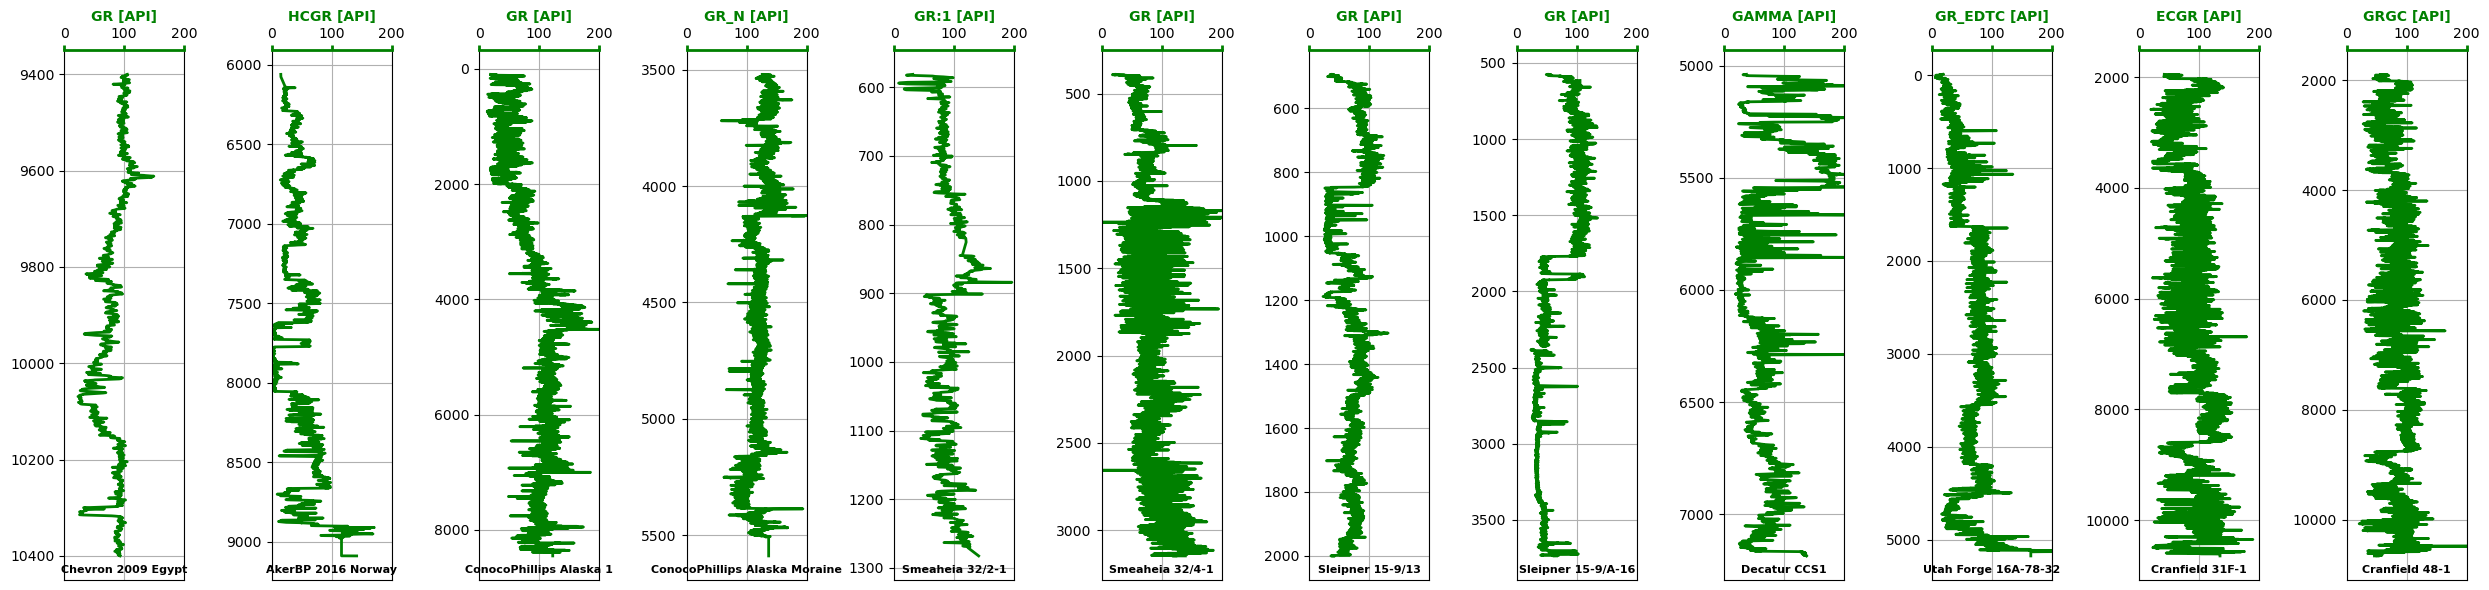

In [341]:
fig, axs = plt.subplots(1, 12, figsize=(25,6))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = axs
glb, gub = 0, 200

plot_curve(ax1, well1, 'GR', lb=glb, ub=gub, color='g', units='API', subtitle='Chevron 2009 Egypt')
plot_curve(ax2, well2, 'HCGR', lb=glb, ub=gub, color='g', units='API', subtitle='AkerBP 2016 Norway')
plot_curve(ax3, well3, 'GR', lb=glb, ub=gub, color='g', units='API', subtitle='ConocoPhillips Alaska 1')
plot_curve(ax4, well4, 'GR_N', lb=glb, ub=gub, color='g', units='API', subtitle='ConocoPhillips Alaska Moraine')
plot_curve(ax5, well5, 'GR:1', lb=glb, ub=gub, color='g', units='API', subtitle='Smeaheia 32/2-1')
plot_curve(ax6, well6, 'GR', lb=glb, ub=gub, color='g', units='API', subtitle='Smeaheia 32/4-1')
plot_curve(ax7, well7, 'GR', lb=glb, ub=gub, color='g', units='API', subtitle='Sleipner 15-9/13')
plot_curve(ax8, well8, 'GR', lb=glb, ub=gub, color='g', units='API', subtitle='Sleipner 15-9/A-16')
plot_curve(ax9, well9, 'GAMMA', lb=glb, ub=gub, color='g', units='API', subtitle='Decatur CCS1')
plot_curve(ax10, well10, 'GR_EDTC', lb=glb, ub=gub, color='g', units='API', subtitle='Utah Forge 16A-78-32')
plot_curve(ax11, well11, 'ECGR', lb=glb, ub=gub, color='g', units='API', subtitle='Cranfield 31F-1')
plot_curve(ax12, well12, 'GRGC', lb=glb, ub=gub, color='g', units='API', subtitle='Cranfield 48-1')

[a.invert_yaxis() for a in axs]
plt.tight_layout()
plt.show()

In [663]:
def resample_signal(signal, new_size, kind='cubic'):
    x_old = np.linspace(0, 1, len(signal))
    x_new = np.linspace(0, 1, new_size)
    interpolator = interpolate.interp1d(x_old, signal.flatten(), kind=kind)
    return interpolator(x_new).reshape(-1,1)

w1: (2801,)
stencil: (29,)


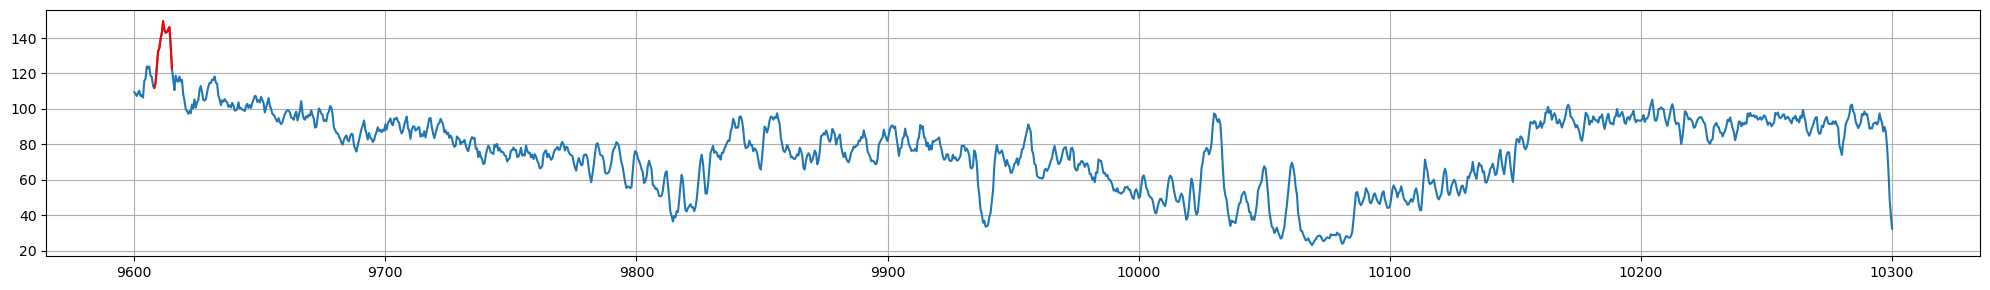

In [708]:
w1 = well1.loc[9600:10300]['GR']
print('w1: {}'.format(w1.shape))

window_size = 7
p1 = 9608

stencil = w1.loc[p1:p1+window_size]
print('stencil: {}'.format(stencil.shape))

fig = plt.figure(figsize=(20,3))
plt.plot(w1.index, w1)
plt.plot(stencil.index, stencil, 'r')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

In [750]:
windows = []
for i in range(len(w1) - len(stencil) + 1):
    window = w1.iloc[i:i+len(stencil)]
    windows.append(window)
windows = np.array(windows)
print(windows.shape)

(2773, 29)


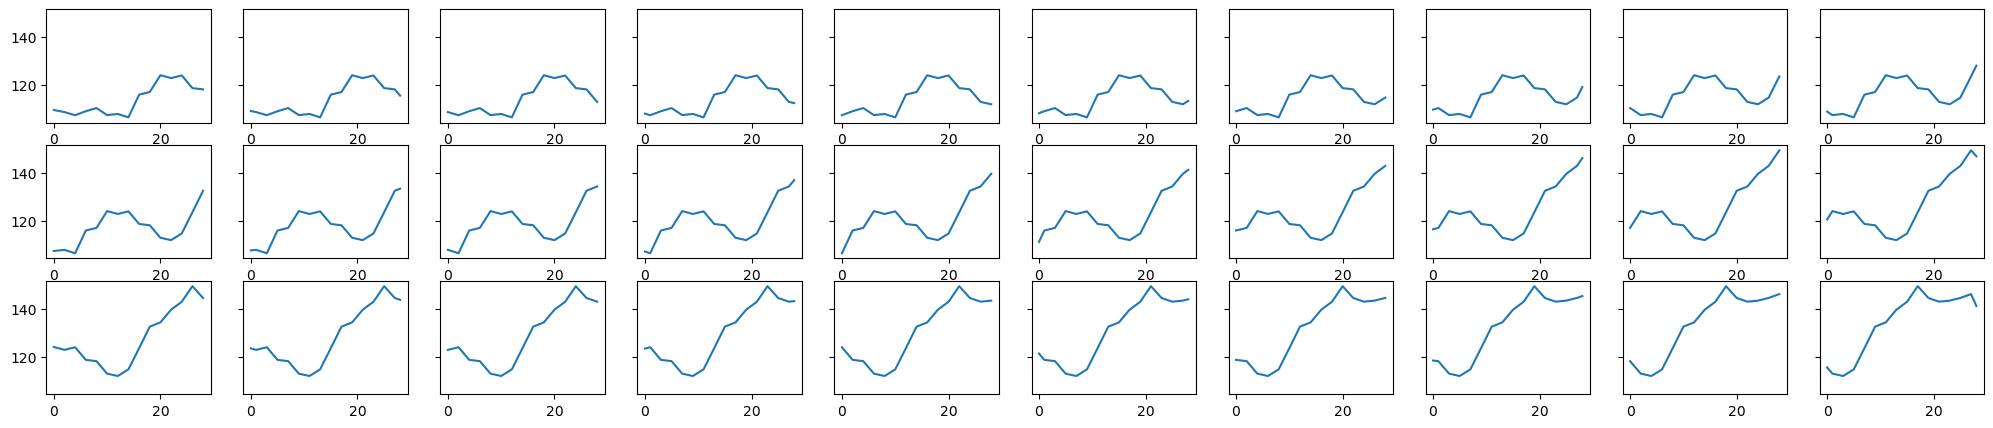

In [752]:
k = 0
fig, axs = plt.subplots(3, 10, figsize=(25,5), sharey=True)
for i in range(3):
    for j in range(10):
        ax = axs[i,j]
        ax.plot(windows[k])
        k += 1